In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

2023-08-27 20:03:22.291621: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-27 20:03:22.543435: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-27 20:03:22.548719: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-27 20:03:22.548748: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
assert X_train.shape == (60000, 28, 28)
assert y_train.shape == (60000,)

assert X_test.shape == (10000, 28, 28)
assert y_test.shape == (10000,)

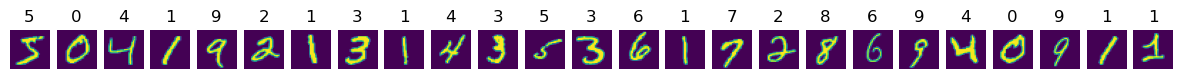

In [4]:
images_amount = 25

fig, ax = plt.subplots(1, images_amount, figsize=(15,10))

for i in range(0, images_amount):
    ax[i].set_title(y_train[i])
    ax[i].imshow(X_train[i])
    ax[i].axis('off')

#### Try to implement basic Neural Network to classify numbers

In [5]:
idxs = np.where((y_train == 0) | (y_train == 1))
y_train = y_train[idxs]
X_train = X_train[idxs]

In [6]:
test_idxs = np.where((y_test == 0) | (y_test == 1))
y_test = y_test[test_idxs]
X_test = X_test[test_idxs]

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
print(f"Train: min {X_train.min()}, max {X_train.max()}", )
print(f"Test: min {X_test.min()}, max {X_test.max()}", )

Train: min 0.0, max 1.0
Test: min 0.0, max 1.0


In [10]:
y_train

array([0, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [64]:
from keras.utils import to_categorical

In [65]:
y_test_cat = to_categorical(y_test)
y_train_cat = to_categorical(y_train)

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.losses import categorical_crossentropy
from keras.optimizers import gradient_descent_v2
from keras.metrics import accuracy

In [67]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(2, activation='sigmoid'))

optimizer = gradient_descent_v2.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss=categorical_crossentropy, metrics=accuracy)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 1570      
                                                                 
Total params: 1,570
Trainable params: 1,570
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=1)

396/396 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.0000e+00 - val_loss: 0.0203 - val_accuracy: 0.0000e+00


ValueError: in user code:

    File "c:\Users\mmakarov\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\mmakarov\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\mmakarov\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\mmakarov\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "c:\Users\mmakarov\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\mmakarov\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_4' (type Sequential).
    
    Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (None, 28)
    
    Call arguments received by layer 'sequential_4' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 28), dtype=float32)
      • training=False
      • mask=None


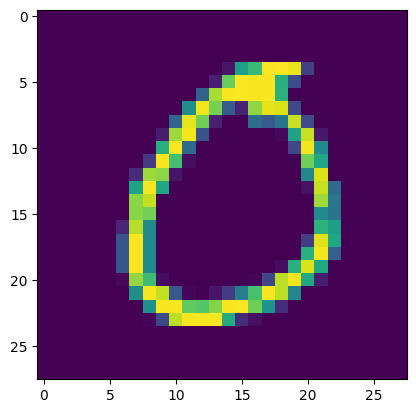

In [71]:
img_idx = 123

plt.imshow(X_test[img_idx])
pred = model.predict(X_test[img_idx])
print(f"Prediction: {pred.argmax(-1)[0]}")
